# Ejercicios para prácticar


1. Usando el dataset `winequality-red.csv`, el cual consiste en datos de vinos rojos basados en datos físico-químicos y 
una métrica de calidad de vino. Más info en [Kaggle](https://www.kaggle.com/datasets/uciml/red-wine-quality-cortez-et-al-2009). 
Queremos predecir la calidad del vino usando los atributos físico-químicos del mismo.
   1. Lea el dataset como un DataFrame de Pandas. Realice un estudio de variables. Como se llaman y que están midiendo 
   exactamente (vea la documentación del dataset). Además, analice que tipo de variables (incluido el target) son, 
   cuál es el rango de estas variables y cómo se distribuyen (histograma). Además, realice una matriz de correlación, 
   ¿cuáles variables parecen estar correlacionadas? ¿Y con respectos a la calidad del vino?
   2. Realice si es necesaria la limpieza de datos y corrección de errores.
   3. Construya usando un SVM un modelo de regresión o clasificación (multi-clase), según lo que considere más 
   apropiado, el cual se intente predecir la calidad del vino usando el nivel de alcohol.
      1. Realiza la separación entre el dataset de entrenamiento y testeo. Utilice 80%-20%.
      2. Determine que métrica se va a usar para evaluar la calidad del modelo (MSE, MAE, etc.)
      3. Entrene el modelo con el set de entrenamiento.
      4. Evalúe el modelo con la métrica de evaluación.



In [93]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, MinMaxScaler, LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC, SVR
from sklearn.metrics import classification_report, confusion_matrix

1. Lea el dataset como un DataFrame de Pandas. Realice un estudio de variables. Como se llaman y que están midiendo 
   exactamente (vea la documentación del dataset). Además, analice que tipo de variables (incluido el target) son, 
   cuál es el rango de estas variables y cómo se distribuyen (histograma). Además, realice una matriz de correlación, 
   ¿cuáles variables parecen estar correlacionadas? ¿Y con respectos a la calidad del vino?

In [94]:
df = pd.read_csv("datasets/winequality-red.csv")

In [95]:
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [96]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


In [97]:
df.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


In [98]:
print("Valores nulos: ", df.isnull().sum())

print("\nValores duplicados: ", df.duplicated().sum())

Valores nulos:  fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

Valores duplicados:  240


In [99]:
# Eliminamos los valores duplicados
df.drop_duplicates(inplace=True)

print("\nValores duplicados: ", df.duplicated().sum())


Valores duplicados:  0


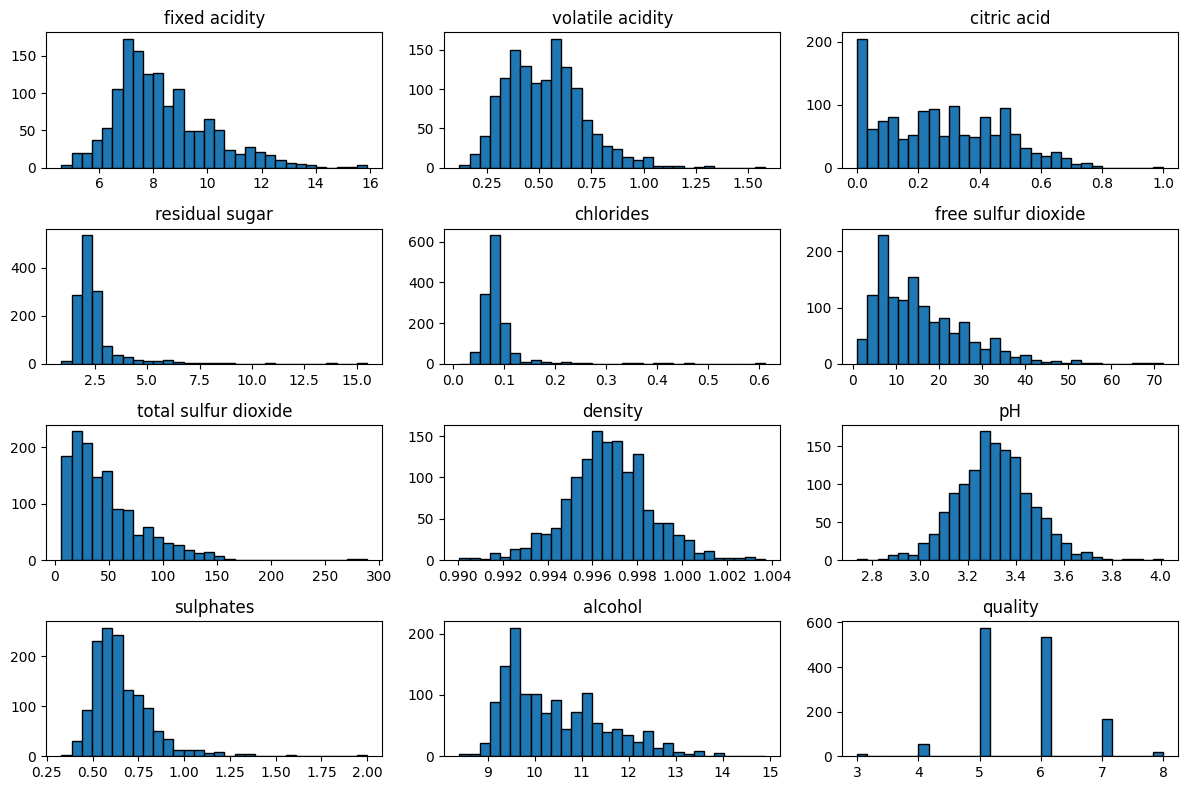

In [100]:
df.hist(bins=30, figsize=(12,8), edgecolor='black', grid=False)

plt.tight_layout()
plt.show()

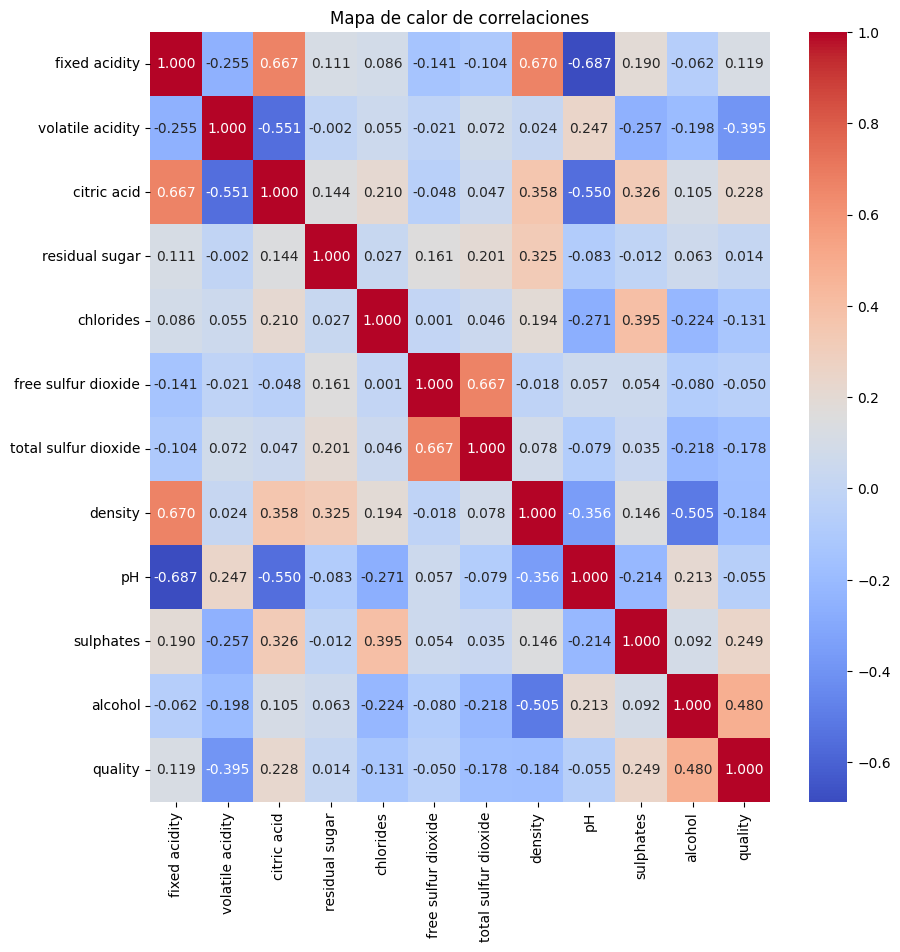

In [101]:
plt.figure(figsize=(10, 10))

sns.heatmap(df.corr(), annot=True, cmap='coolwarm', fmt=".3f")
plt.title('Mapa de calor de correlaciones')
plt.show()

Variables mas correlacionadas:
* fixed acidity con citric acid, density, pH
* volatile acidity con citric acid
* citric acid con pH
* free sulfur dioxide con total sulfur dioxide
* density con alcohol

Y con respecto a la calidad del vino:
* quality con alcohol, volatile acidity, sulphates y citric acid

2. Realice si es necesaria la limpieza de datos y corrección de errores.

Ya se comprobo los datos nulos y se eliminaron datos duplicados

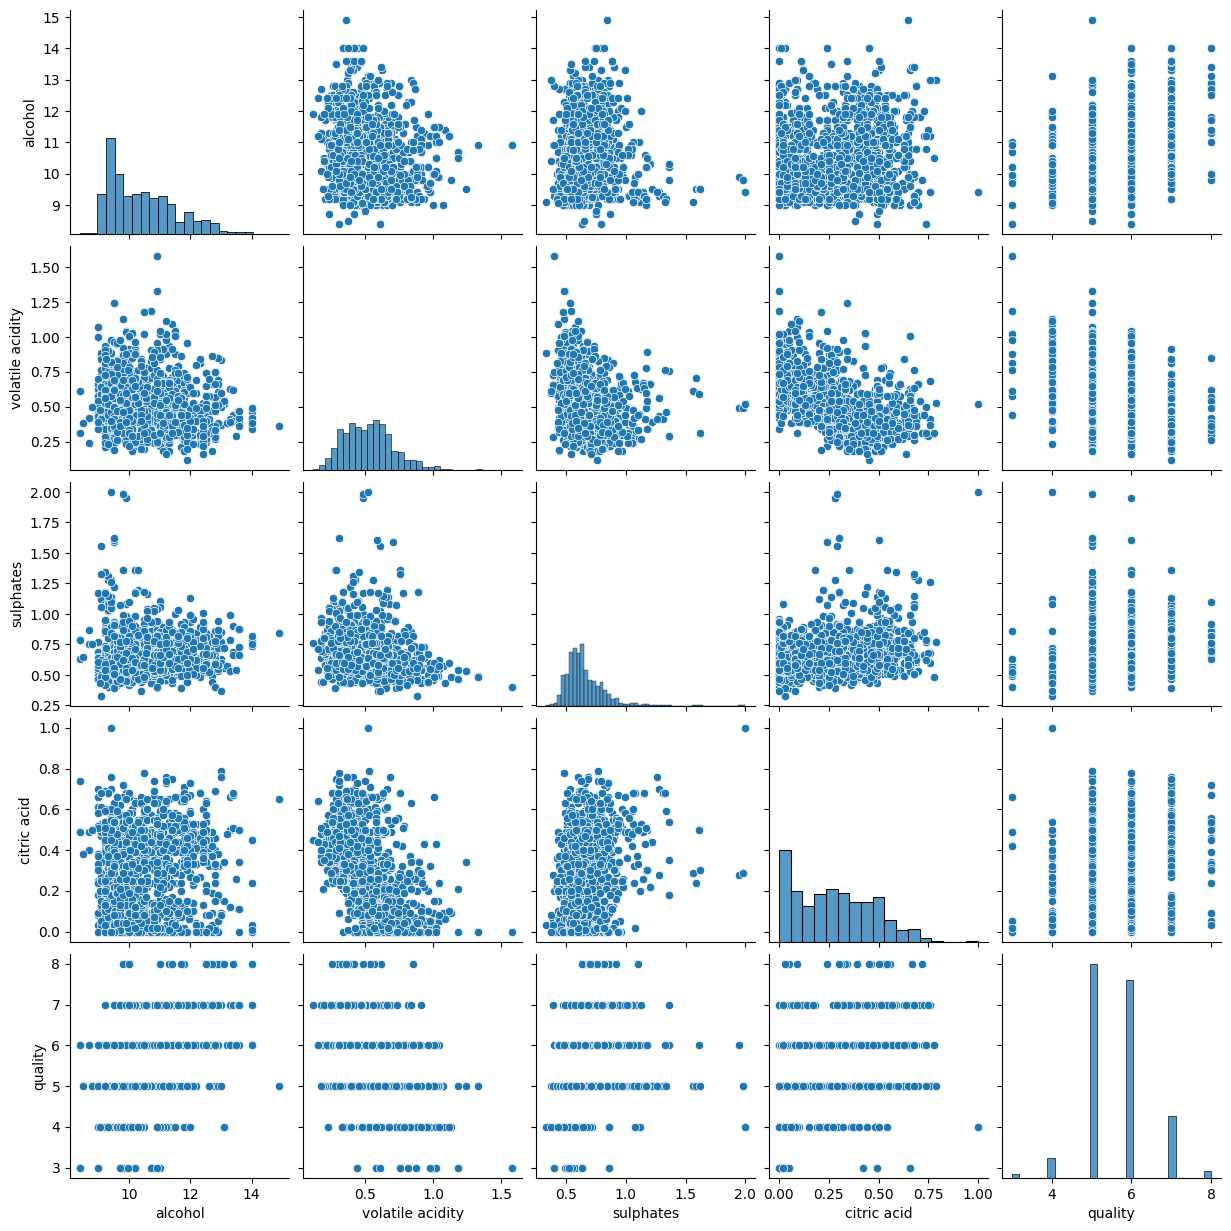

In [102]:
sns.pairplot(data=df, vars=["alcohol", "volatile acidity", "sulphates", "citric acid", "quality"])#, hue="quality")
plt.show()

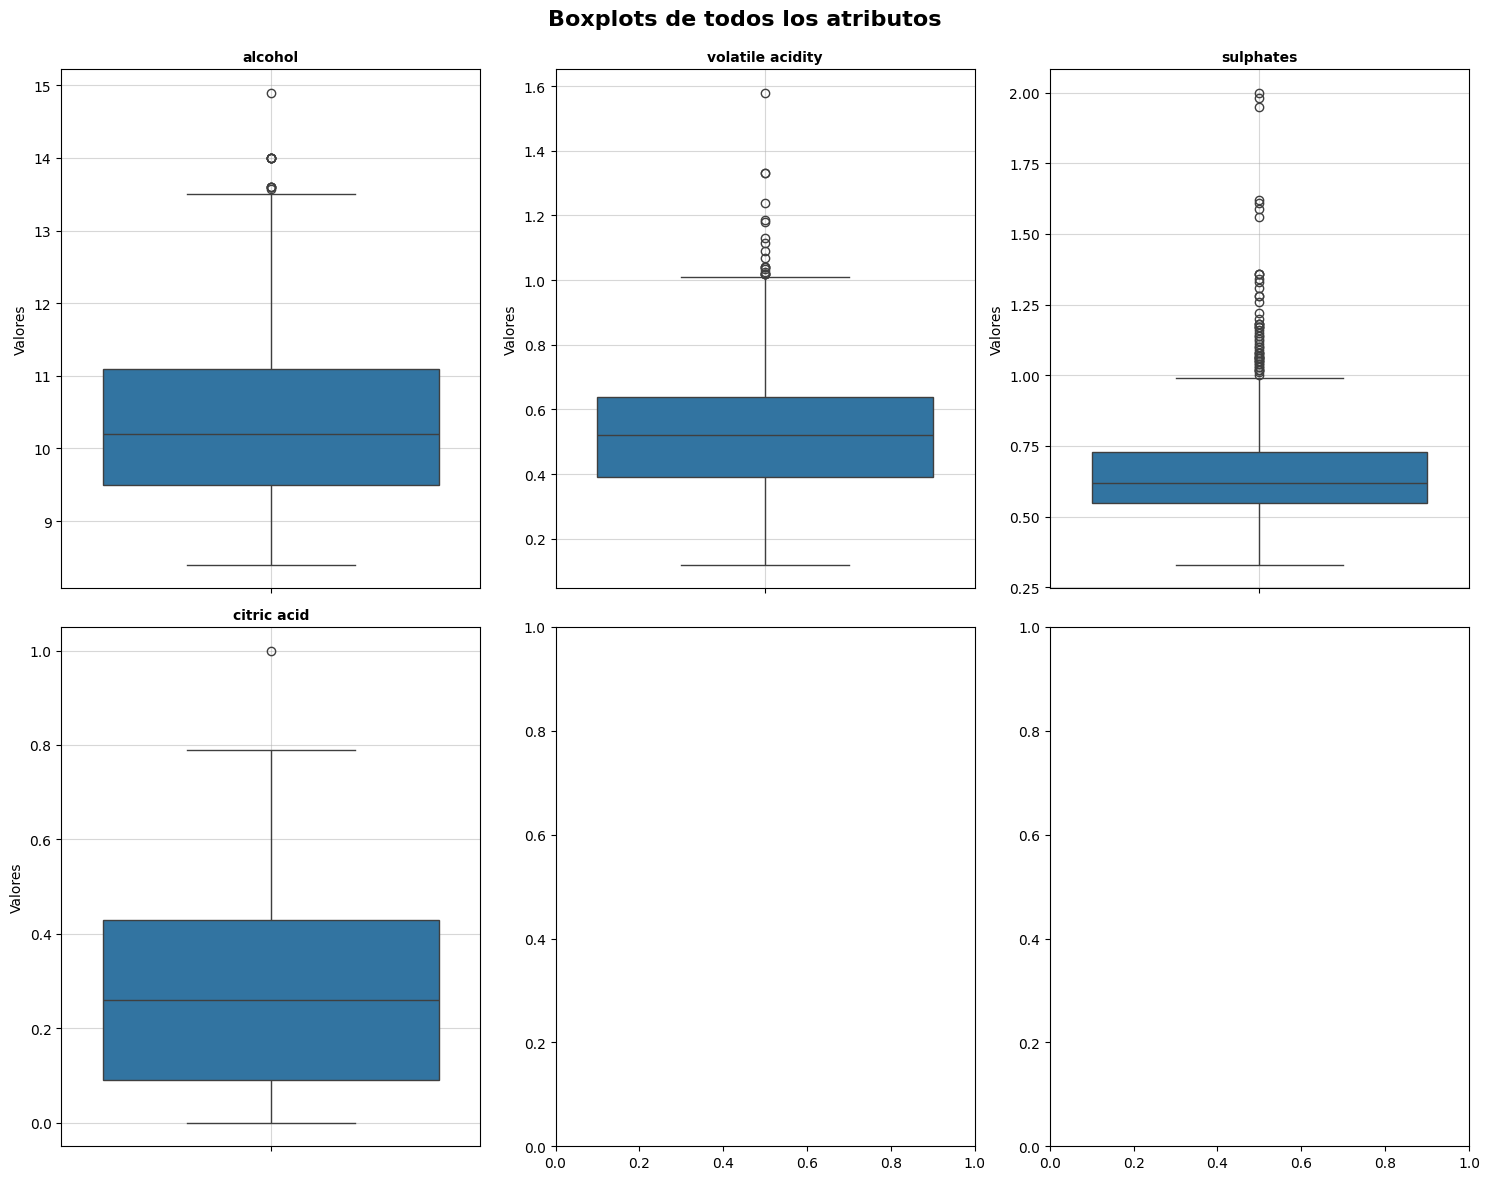

In [103]:
# Boxplots de todas las features
features = ["alcohol", "volatile acidity", "sulphates", "citric acid"]
n_features = len(features)

n_rows = 2
n_cols = 3

fig, axes = plt.subplots(n_rows, n_cols, figsize=(15, 12))
axes = axes.flatten() if n_features > 1 else [axes]

for i, feature in enumerate(features):
    sns.boxplot(data=df, y=feature, ax=axes[i])#, hue="quality")
    #axes[i].boxplot(df[feature])
    axes[i].set_title(f'{feature}', fontsize=10, fontweight='bold')
    axes[i].set_ylabel('Valores')
    axes[i].grid(True, alpha=0.5)

plt.suptitle('Boxplots de todos los atributos', fontsize=16, fontweight='bold')
plt.tight_layout()
plt.subplots_adjust(top=0.93)
plt.show()

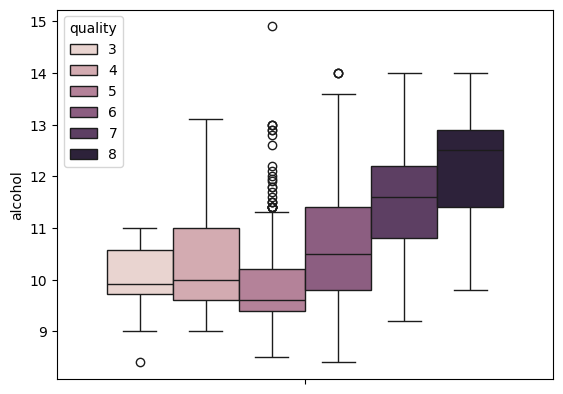

In [104]:
sns.boxplot(data=df, y="alcohol", hue="quality")
plt.show()

3. Construya usando un SVM un modelo de regresión o clasificación (multi-clase), según lo que considere más 
   apropiado, el cual se intente predecir la calidad del vino usando el nivel de alcohol.
      1. Realiza la separación entre el dataset de entrenamiento y testeo. Utilice 80%-20%.
      2. Determine que métrica se va a usar para evaluar la calidad del modelo (MSE, MAE, etc.)
      3. Entrene el modelo con el set de entrenamiento.
      4. Evalúe el modelo con la métrica de evaluación.

## SVC

In [105]:
# Agrupar calidades bajas, medias y altas
df["quality_grouped"] = df["quality"].apply(
    lambda q: 0 if q <= 4 else (1 if q <= 6 else 2)
)

In [106]:
X = df[["alcohol", "volatile acidity"]]
y = df["quality_grouped"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

X_train.shape, X_test.shape, y_train.shape, y_test.shape

((1087, 2), (272, 2), (1087,), (272,))

In [107]:
# No se codifica ya que el formato es el correcto
# le = LabelEncoder()
# y_train = le.fit_transform(y_train)
# y_test = le.transform(y_test)

In [108]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [109]:
svc = SVC(C=3, kernel="rbf", decision_function_shape='ovo', class_weight="balanced", probability=True)
svc.fit(X_train, y_train)

,C,3
,kernel,'rbf'
,degree,3
,gamma,'scale'
,coef0,0.0
,shrinking,True
,probability,True
,tol,0.001
,cache_size,200
,class_weight,'balanced'
,verbose,False


📊 Reporte de clasificación Regresion Logistica
              precision    recall  f1-score   support

           0      0.151     0.615     0.242        13
           1      0.934     0.514     0.663       222
           2      0.330     0.865     0.478        37

    accuracy                          0.566       272
   macro avg      0.472     0.665     0.461       272
weighted avg      0.815     0.566     0.618       272

📊 Matriz de confusión


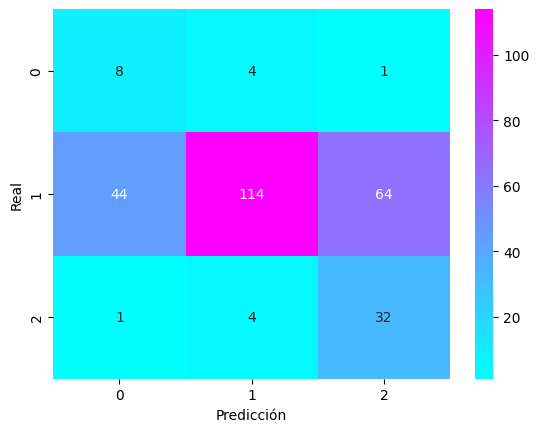

In [111]:
y_pred = svc.predict(X_test)

print("📊 Reporte de clasificación Regresion Logistica")
print(classification_report(y_test, y_pred, digits=3))

print("📊 Matriz de confusión")
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt="d", cmap="cool", cbar=True, xticklabels=svc.classes_, yticklabels=svc.classes_)
plt.xlabel("Predicción")
plt.ylabel("Real")
plt.show()

In [112]:
log = LogisticRegression(class_weight="balanced")
log.fit(X_train, y_train)

y_pred = log.predict(X_test)

print("📊 Reporte de clasificación Regresion Logistica")
print(classification_report(y_test, y_pred, digits=3))

📊 Reporte de clasificación Regresion Logistica
              precision    recall  f1-score   support

           0      0.107     0.615     0.182        13
           1      0.921     0.473     0.625       222
           2      0.361     0.811     0.500        37

    accuracy                          0.526       272
   macro avg      0.463     0.633     0.436       272
weighted avg      0.806     0.526     0.587       272



In [118]:
knn = KNeighborsClassifier(n_neighbors=3, weights="distance")
knn.fit(X_train, y_train)

y_pred = knn.predict(X_test)

print("📊 Reporte de clasificación Regresion Logistica")
print(classification_report(y_test, y_pred, digits=3))

📊 Reporte de clasificación Regresion Logistica
              precision    recall  f1-score   support

           0      0.000     0.000     0.000        13
           1      0.819     0.878     0.848       222
           2      0.241     0.189     0.212        37

    accuracy                          0.743       272
   macro avg      0.354     0.356     0.353       272
weighted avg      0.702     0.743     0.721       272



⚠️ Como las clases target tienen poca representatividad, se decide codificar en "bueno" y "malo"

In [119]:
y_final = (df["quality"] >= 6).astype(int) # 1: Good wine, 0: Poor wine
y_final.value_counts()

quality
1    719
0    640
Name: count, dtype: int64

In [120]:
X_train, X_test, y_train, y_test = train_test_split(X, y_final, test_size=0.2, random_state=42, stratify=y)

In [121]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [125]:
svc_final = SVC(C=3)
svc_final.fit(X_train, y_train)

,C,3
,kernel,'rbf'
,degree,3
,gamma,'scale'
,coef0,0.0
,shrinking,True
,probability,False
,tol,0.001
,cache_size,200
,class_weight,None
,verbose,False


📊 Reporte de clasificación Regresion Logistica
              precision    recall  f1-score   support

           0      0.701     0.701     0.701       127
           1      0.738     0.738     0.738       145

    accuracy                          0.721       272
   macro avg      0.719     0.719     0.719       272
weighted avg      0.721     0.721     0.721       272

📊 Matriz de confusión


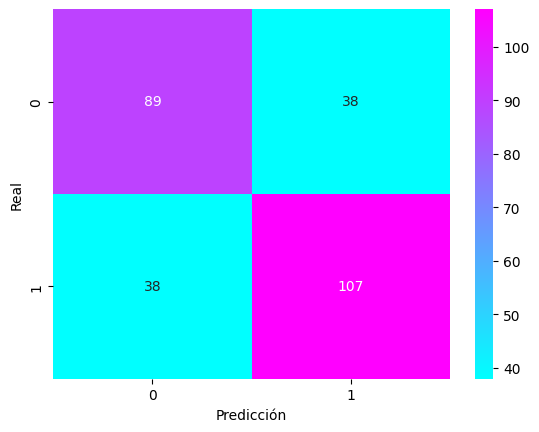

In [126]:
y_pred_final = svc_final.predict(X_test)

print("📊 Reporte de clasificación Regresion Logistica")
print(classification_report(y_test, y_pred_final, digits=3))

print("📊 Matriz de confusión")
cm = confusion_matrix(y_test, y_pred_final)
sns.heatmap(cm, annot=True, fmt="d", cmap="cool", cbar=True, xticklabels=svc_final.classes_, yticklabels=svc_final.classes_)
plt.xlabel("Predicción")
plt.ylabel("Real")
plt.show()

In [127]:
from sklearn.model_selection import GridSearchCV

params = [
    {"C": [0.01, 0.1, 1, 5, 10, 50, 100], "kernel": ["linear"]},
    {"C": [0.01, 0.1, 1, 5, 10, 50, 100], "gamma": [0.1, 0.5, 1, 2, 10, 100], "kernel": ["rbf"]},
    {"C": [0.01, 0.1, 1, 5, 10, 50, 100], "degree": [2, 3, 4, 5, 6], "kernel": ["poly"]}
]

svc_grid = SVC()

grid = GridSearchCV(svc_grid,
                    param_grid=params,
                    refit=True,
                    cv=5,
                    scoring='f1',
                    n_jobs=-1)
grid.fit(X_train, y_train)

grid.best_params_

{'C': 0.01, 'gamma': 0.1, 'kernel': 'rbf'}

📊 Reporte de clasificación
              precision    recall  f1-score   support

           0      0.712     0.740     0.726       127
           1      0.764     0.738     0.751       145

    accuracy                          0.739       272
   macro avg      0.738     0.739     0.738       272
weighted avg      0.740     0.739     0.739       272

📊 Matriz de confusión


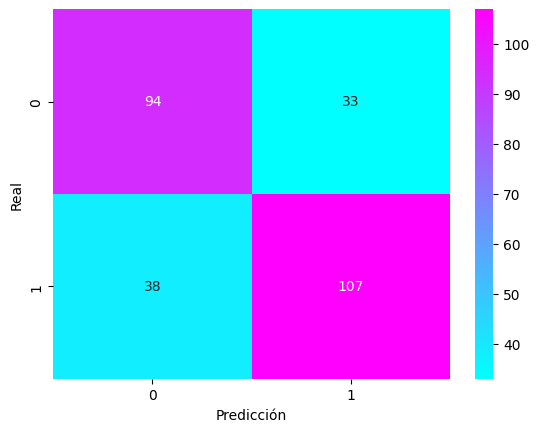

In [31]:
svc_best = SVC(**grid.best_params_, probability=True)
svc_best.fit(X_train, y_train)

y_pred_best = svc_best.predict(X_test)

print("📊 Reporte de clasificación")
print(classification_report(y_test, y_pred_best, digits=3))

print("📊 Matriz de confusión")
cm = confusion_matrix(y_test, y_pred_best)
sns.heatmap(cm, annot=True, fmt="d", cmap="cool", cbar=True, 
            xticklabels=svc_best.classes_, yticklabels=svc_best.classes_)
plt.xlabel("Predicción")
plt.ylabel("Real")
plt.show()

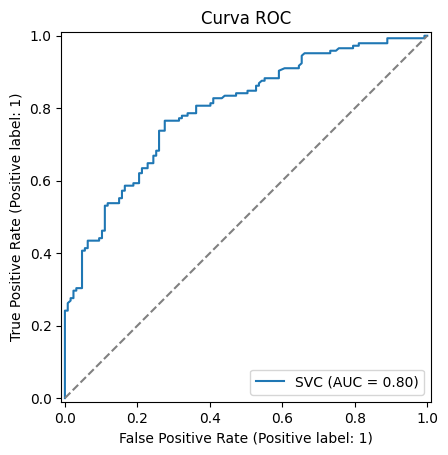

In [128]:
from sklearn.metrics import RocCurveDisplay

RocCurveDisplay.from_estimator(estimator=svc_best, X=X_test, y=y_test)
plt.plot([0, 1], [0, 1], linestyle="--", color="gray")
plt.title("Curva ROC")
plt.show();

---
# Parte 2
   1. Construya varios arbol de regresión. Juegue con las variables del arbol para mejorar los resultados usando algún
   método de búsqueda de hiper-parámetros.
   2. Usando la métrica de evaluación del modelo del SVR, compare los resultados de los árboles con los obtenidos 
   anteriormente.
   3. ¿Cuál fue el mejor modelo en métricas? ¿Y de facilidad de entender los resultados? Discuta los resultados.

In [129]:
dtc_columnas = ["alcohol", "volatile acidity", "sulphates", "citric acid"]
X = df[dtc_columnas]
#y = df["quality_grouped"]

In [130]:
X_train, X_test, y_train, y_test = train_test_split(X, y_final, test_size=0.2, random_state=42)

In [131]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [132]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV

hyperparams = {
    "ccp_alpha": np.linspace(0, 0.5, 50),
    "criterion": ["gini", "entropy"],
    "min_samples_split": np.arange(2, 10),
    "min_samples_leaf": np.arange(2, 10),
    "class_weight": ["balanced"]
}

dtc = DecisionTreeClassifier()

grid = GridSearchCV(dtc,
                    param_grid=hyperparams,
                    refit=True,
                    cv=3,
                    scoring='f1',
                    n_jobs=-1)
grid.fit(X_train, y_train)

print(f"Mejores parámetros: {grid.best_params_}")

Mejores parámetros: {'ccp_alpha': np.float64(0.0), 'class_weight': 'balanced', 'criterion': 'gini', 'min_samples_leaf': np.int64(9), 'min_samples_split': np.int64(8)}


In [133]:
# Evaluemos y entrenemos al mejor modelo encontrado:
best_dtc = DecisionTreeClassifier(**grid.best_params_)
best_dtc.fit(X_train, y_train)

,criterion,'gini'
,splitter,'best'
,max_depth,None
,min_samples_split,np.int64(8)
,min_samples_leaf,np.int64(9)
,min_weight_fraction_leaf,0.0
,max_features,None
,random_state,None
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,class_weight,'balanced'


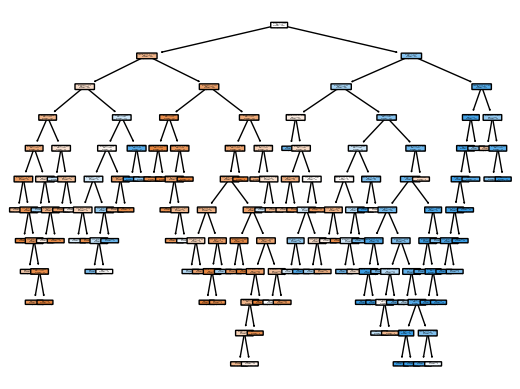

In [134]:
from sklearn.tree import plot_tree
plot_tree(best_dtc, filled=True, feature_names=dtc_columnas, rounded=True);

📊 Reporte de clasificación
              precision    recall  f1-score   support

           0      0.727     0.748     0.737       135
           1      0.744     0.723     0.733       137

    accuracy                          0.735       272
   macro avg      0.735     0.735     0.735       272
weighted avg      0.736     0.735     0.735       272

📊 Matriz de confusión


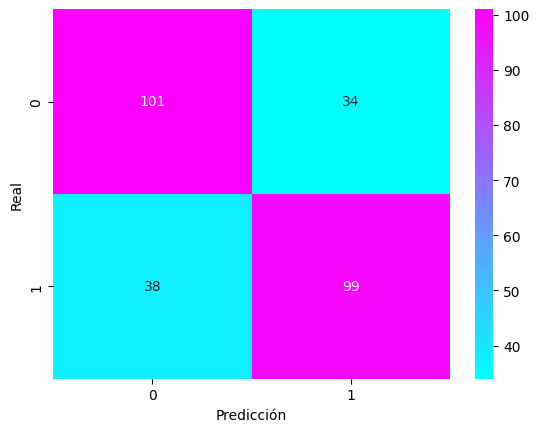

In [135]:
y_pred_best = best_dtc.predict(X_test)

print("📊 Reporte de clasificación")
print(classification_report(y_test, y_pred_best, digits=3))

print("📊 Matriz de confusión")
cm = confusion_matrix(y_test, y_pred_best)
sns.heatmap(cm, annot=True, fmt="d", cmap="cool", cbar=True, 
            xticklabels=svc_best.classes_, yticklabels=svc_best.classes_)
plt.xlabel("Predicción")
plt.ylabel("Real")
plt.show()

📝 Respecto al mejor SVC, DTC tuvo una mejor muy leve